# Note: Currently under construction

TODO:
- Reorder sections
- Update formatting

# Introduction


Talk about why it's important to know when to apply what

# Problems (rename this)

In [1]:
# TODO: Remove imports that aren't used
import sys
import os
import time
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

print(time.strftime('%Y/%m/%d %H:%M'))
print('OS:', sys.platform)
print('CPU Cores:', os.cpu_count())
print('Python:', sys.version)
print('NumPy:', np.__version__)
print('Pandas:', pd.__version__)
print('Scikit-Learn:', sklearn.__version__)

# Displays all dataframe columns
pd.set_option('display.max_columns', None)

%matplotlib inline

2019/02/23 18:28
OS: win32
CPU Cores: 8
Python: 3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]
NumPy: 1.14.5
Pandas: 0.23.3
Scikit-Learn: 0.20.0


## Statistical Inference: Proportions

## Problem \#1

You work at a software company analyzing data for a team that makes a really cool application. The developers have been hard at work for the last month building features, fixing bugs, and adding functionality for your app. In order to ensure that there are not major issues with the new version, your team rolls out the new version in waves across an increasingly larger percentage of users and monitor the performance in order to make sure it works well. Your team starts with rolling out the new version to 10%, then 25%, 50%, and finally 100%.

Your team is in the process of rolling out a new version (1204) to production and has it currently rolled out at 10%. One of the lead developers frantically comes to your office one morning and pulls up a dashboard showing that the reliability number for the new version is only at 93%! This is appears to be a sizable drop from the previous version which is at 97% reliability. That's a 4% drop!

Is this something to be worried about? What do you do?

[Answer](https://en.wikipedia.org/wiki/Chi-squared_test)

In [2]:
# The observed reliability in the two versions
version_1203_reliability = 0.97
version_1204_reliability = 0.93

# The total number of users along with the percentage of users the newer version was rolled out to
total_num_users = 23000
version_1204_rollout_percentage = 0.10

# Calculating the number of users that are using each version
version_1204_rollout_number = total_num_users * version_1204_rollout_percentage
version_1203_rollout_number = total_num_users - version_1204_rollout_number

# Calculating the number of users in each group that are not experiencing failures
version_1203_successful_users = version_1203_rollout_number * version_1203_reliability
version_1204_successful_users = version_1204_rollout_number * version_1204_reliability

# Making arrays of [total users, successful users] for the chi square test
version_1203_chisquare_array = [version_1203_rollout_number, version_1203_successful_users]
version_1204_chisquare_array = [version_1204_rollout_number, version_1204_successful_users]

# Performing the chi-square proportions test
# Remember to use ?scipy.stats.chi2_contingency() if you want to see the documentation for the arguments or the objects returned
chisq_test_results = scipy.stats.chi2_contingency([version_1203_chisquare_array, version_1204_chisquare_array])

# Extracting the p-value from the test
p_value = chisq_test_results[1]

# Reporting the p-value
print('Chi-square p-value:', p_value)

# Setting the cutoff for statistical significance. This value should be determined by business justification.
cutoff_for_statistical_significance = 0.05
if p_value <= cutoff_for_statistical_significance:
    print('Yes, there is a statistically significant difference')
else:
    print('No, there is not a statistically significant difference')

Chi-square p-value: 0.1882819464095165
No, there is not a statistically significant difference


**What we did**

We used a statistical inference technique called a chi-square test. This is the same test that is used in R's `prop.test()` function. It tells us if there is a statistically significant difference in the proportions between the groups that we are observing by providing it with the number of trials and the number of successes per group. In this case, the number of users are the number of trials and the number of successes is the number of users that have not encountered any errors/crashes/hangs.


**Potential pitfalls**

- Not making sure the [assumptions for the test](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3900058/) are satisfied. There are a few cases where this scenario may violate these assumptions:
    - Example 1: If sessions are used instead of users, users that are caught in a bad state and are reporting several failures will drag the reliability down and cause us to conclude that there is significant difference when there really isn't one.
    - Example 2: If using a separate group of users that explicitly opt into a beta program for the newer version, there may be issues in detecting changes that may not exist from bias because those users are fundamentally different.
    - Example 3: If the data for these two groups were gathered at different times, there might have been external factors that 
- Using too strict of a p-value. 0.05 doesn't need to be the cutoff, so use whichever value you feel comfortable with.
    - [This comic](https://xkcd.com/1478/) shows why strict p-values are silly.
    - If a p-value is relatively close to the threshold, you may need to gather more data. In this case that means either waiting a few more days for more users or rolling the new version out to a larger percentage of users.
        - It is more difficult to detect statistical significance with more imbalanced groups. You can calculate the number of samples required to detect a statistical significance for a specific change.
        
        
**Examples of other cases where this technique works**
- TODO: List these

## Statistical Inference: Testing Means

- Pick a problem
- Provide data
- Talk about why certain methods won't work
- Talk about method to use
- Solve it

- Talk about lessons learned

### Bayesian Inference
- Add onto previous problem
- Provide data
- Talk about why certain methods won't work
- Talk about method to use
- Solve it

- Talk about lessons learned

## Machine Learning: Regression
- Pick a problem
- Provide data
- Talk about why certain methods won't work
- Talk about method to use
- Solve it

The Problem

You work for a real estate startup in Boston where the CEO just hired you because he read something about [data scientists being the sexiest job of the 21st century](https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century). For your first project, he wants you to figure out what the real value of houses in Boston are so they can asses the market value of houses currently for sale and purchase houses with a lower asking price in order to sell it for more in the future. Since this is a hip startup with a ping-pong table in the kitchen next to the bean bag chairs, he wants you to use something like blockchain, neural networks, deep learning, or AI that he can brag about to his stakeholders.

Because this is a new company, they do not have data for previously sold houses in Boston. Your boss sent you an open source dataset on [1978 house prices in Boston](http://lib.stat.cmu.edu/datasets/boston) that she found in a quick search. Here is a description for the values that were copy/pasted from [the documentation](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html):

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town.
- **CHAS:** Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric oxides concentration (parts per 10 million)
- **RM:** Average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built prior to 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per \$10,000
- **PTRATIO:** Pupil-teacher ratio by town
- **B:** $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town
    - **Question:** Is this an ethical variable to use? Why aren't other ethnicities represented? How should you handle it?
- **LSTAT:** \% lower status of the population
- **MEDV:** Median value of owner-occupied homes in \$1,000’s

How do you solve this using the data you were provided with?

[Answer](https://en.wikipedia.org/wiki/Regression_analysis)

In [3]:
# Loading in the housing data from scikit-learn
housing_raw_data = datasets.load_boston()

# Putting the features into a data frame
housing_data = pd.DataFrame(data=housing_raw_data.data,
                            columns=housing_raw_data.feature_names)

# Adding the label to the data frame
housing_data['MedianPrice'] = housing_raw_data.target

# Removing the ethically questionable column
housing_data.drop('B', axis=1, inplace=True)

# Reporting the number of records and 
print('Number of observations:', housing_data.shape[0])
housing_data.head()

Number of observations: 506


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MedianPrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Mean Absolute Error: 4.622568060797915


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


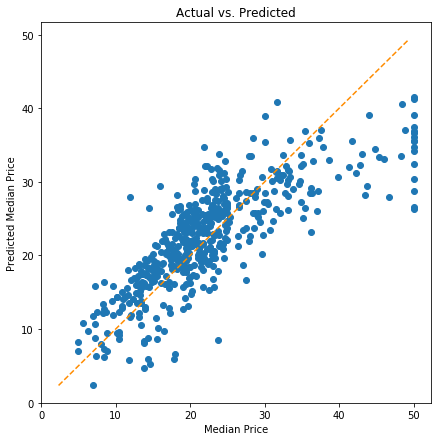

In [4]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neural_network import MLPRegressor

# Specifying the features and the label
X = housing_data.drop('MedianPrice', axis=1)  # Features
y = housing_data['MedianPrice']  # Label

# Instantiating a neural network with the default parameters
model = MLPRegressor(random_state=46)  # Setting a seed so we get the same results every time

# Using k-fold cross validation to fit/evaluate the model
# This is because there are so few observations, so a simple train/test split is more likely to be misleading
# It's typically best to use k-folds cross validation if you have less than 300,000 observations
k_fold = KFold(n_splits=10, shuffle=True, random_state=46)  # Instantiating the k-folds object with 10 folds
k_fold_scores = cross_val_score(model, X, y, cv=k_fold,  # Fitting the k-folds object
                                n_jobs=-1,  # Parallel processing for all cores on your CPU
                                scoring='neg_mean_absolute_error')  # Specifying mean absolute error as the metric to report
neural_network_mean_absolute_error = abs(np.mean(k_fold_scores))  # Gathering the average mean absolute error from the folds
print('Mean Absolute Error:', neural_network_mean_absolute_error)  # Reporting the mean absolute error

# Fitting the model on the entire dataset and producing predictions
model.fit(X, y)
housing_data['Prediction'] = model.predict(X)

# Plotting the predicted vs. actuals in order to observe the bias and variance
plt.figure(figsize=(7, 7))
plt.scatter(x=housing_data['MedianPrice'], y=housing_data['Prediction'])
plt.xlabel('Median Price')
plt.ylabel('Predicted Median Price')

# Plotting a diagonal line to better differentiate the actuals vs. predicted
line_coords = np.arange(housing_data[['MedianPrice', 'Prediction']].min().min(), housing_data[['MedianPrice', 'Prediction']].max().max())
plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

You present this to your boss, but she was a little disappointed that you were only able to predict within \\$4,600 of the median price on average. Additionally, she pointed out that your model is not very good at predicting the price of more expensive houses (meaning your model has a high bias) and that your model has cases where it will predict either \\$8,000 or \\$35,000 for a house that actually costs \\$23,000 (meaning your model has a high variance). She asked you to ignore the CEO's request for something involving neural networks/deep learning and try a few other techniques instead to see if the predictive performance can be increased.

First, you heard that it's always important to use a baseline model like linear or logistic regression, so you try linear regression since this is a regression task:

Mean Absolute Error: 3.5030214945609366


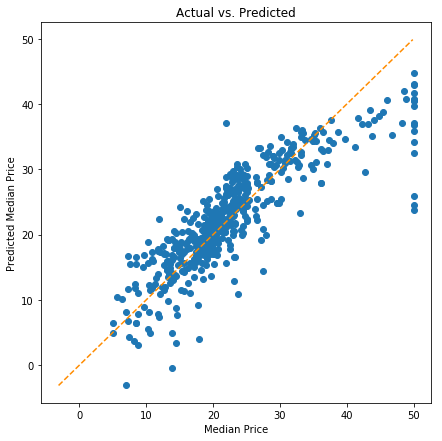

In [5]:
from sklearn.linear_model import LinearRegression

# Instantiating a linear regression model
model = LinearRegression()

# Using k-fold cross validation to fit/evaluate the model
# This is because there are so few observations, so a simple train/test split is more likely to be misleading
# It's typically best to use k-folds cross validation if you have less than 300,000 observations
k_fold = KFold(n_splits=10, shuffle=True, random_state=46)  # Instantiating the k-folds object with 10 folds
k_fold_scores = cross_val_score(model, X, y, cv=k_fold,  # Fitting the k-folds object
                                n_jobs=-1,  # Parallel processing for all cores on your CPU
                                scoring='neg_mean_absolute_error')  # Specifying mean absolute error as the metric to report
linear_regression_mean_absolute_error = abs(np.mean(k_fold_scores))  # Gathering the average mean absolute error from the folds
print('Mean Absolute Error:', linear_regression_mean_absolute_error)  # Reporting the mean absolute error

# Fitting the model on the entire dataset and producing predictions
model.fit(X, y)
housing_data['Prediction'] = model.predict(X)

# Plotting the predicted vs. actuals
plt.figure(figsize=(7, 7))
plt.scatter(x=housing_data['MedianPrice'], y=housing_data['Prediction'])
plt.xlabel('Median Price')
plt.ylabel('Predicted Median Price')

# Plotting a diagonal line to better differentiate the actuals vs. predicted
line_coords = np.arange(housing_data[['MedianPrice', 'Prediction']].min().min(), housing_data[['MedianPrice', 'Prediction']].max().max())
plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

That was already a sizable increase in mean absolute error (MAE) due to a decrease in variance, but the model is still having bias issues by under-predicting the houses at the upper end.

Next, you remember hearing someone say "if you haven't picked a favorite machine learning algorithm, pick random forests", so you decide to try that.

Mean Absolute Error: 2.2621402352941176


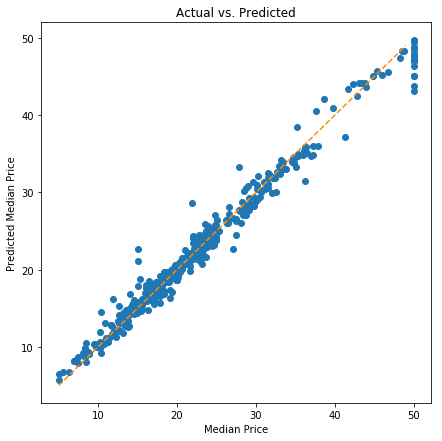

In [6]:
from sklearn.ensemble import RandomForestRegressor

# Instantiating a random forest model
model = RandomForestRegressor(n_estimators=25, random_state=46)

# Using k-fold cross validation to fit/evaluate the model
# This is because there are so few observations, so a simple train/test split is more likely to be misleading
# It's typically best to use k-folds cross validation if you have less than 300,000 observations
k_fold = KFold(n_splits=10, shuffle=True, random_state=46)  # Instantiating the k-folds object with 10 folds
k_fold_scores = cross_val_score(model, X, y, cv=k_fold,  # Fitting the k-folds object
                                n_jobs=-1,  # Parallel processing for all cores on your CPU
                                scoring='neg_mean_absolute_error')  # Specifying mean absolute error as the metric to report
random_forest_mean_absolute_error = abs(np.mean(k_fold_scores))  # Gathering the average mean absolute error from the folds
print('Mean Absolute Error:', random_forest_mean_absolute_error)  # Reporting the mean absolute error

# Fitting the model on the entire dataset and producing predictions
model.fit(X, y)
housing_data['Prediction'] = model.predict(X)

# Plotting the predicted vs. actuals
plt.figure(figsize=(7, 7))
plt.scatter(x=housing_data['MedianPrice'], y=housing_data['Prediction'])
plt.xlabel('Median Price')
plt.ylabel('Predicted Median Price')

# Plotting a diagonal line to better differentiate the actuals vs. predicted
line_coords = np.arange(housing_data[['MedianPrice', 'Prediction']].min().min(), housing_data[['MedianPrice', 'Prediction']].max().max())
plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

The random forest was able to double the performance from the neural network! You take this model to your boss, and she is pleased with the performance. She then asks you to productionalize/operationalize this model, which means put it into production to start making predictions on house listings. This sounds great, but you then realize that there are a couple of issues. How are you going to figure out the nitric oxide concentration or the student-pupil ratio per town? What does % lower status of the population even mean? Wait...if the label is the median house value, is this dataset not even for individual houses?!

Frustrated and embarrassed, you go back to the drawing board to start over.

**What we did**

- Trained several supervised machine learning models to predict house prices.
    - Specifically using regression, the subset of supervised machine learning that is used to predict a number.
- Used cross validation to assess the [generalization error](https://en.wikipedia.org/wiki/Generalization_error) of the models.
    - Specifically, used $k$-folds cross validation to verify that our models weren't achieving good or bad performance by chance because of the low number of observations.
- Examined the bias and variance of our models with plots to see if our models were poor at predicting houses in a certain price range.

**What we should have done**

- **Push back.** This dataset was not appropriate for the task they were looking to accomplish because it both old and only gave the *median price per town* instead of the individual house prices. The only thing worse than making the wrong decision is being confident in making the wrong decision, which this would have most likely done. 
    - We should have collected more recent data by either web scraping or paying a provider.
    - There is no point in using a cool sounding complex model if a simpler model solves it better and faster.
- **Performed an exploratory data analysis** and read the documentation more clearly in order to better understand the data.
    - Censured data with the prices
- **Feature engineering:** See if there are any additional features we can make from our current features in order to encode additional domain knowledge.
- **Hyperparameter tuning:** Rather than use default hyperparameters, try additioanl 


**Lessons Learned:**
- It's ok to push back on requests; especially if there are clear issues with them.
- You are the ultimate owner of a problem, so it is up to you to think through everything from end-to-end and raise the issues.
- More complex models doesn't always mean more performant models
- Think through the problem holistically. Is this how you actually solve it? What data do we have, and what data do we need? How does that cause issues? How will this model perform in the real world? How can I make sure the features I used to train the model are available for the model in production?

        
**Examples of other cases where this technique works**
- TODO: List these

## Machine Learning: Classification
- Pick a problem
- Provide data
- Talk about why certain methods won't work
- Talk about method to use
- Solve it

- Talk about lessons learned

## Machine Learning: Clustering
- Pick a problem
- Provide data
- Talk about why certain methods won't work
- Talk about method to use
- Solve it

- Talk about lessons learned

## Machine Learning: Anomaly Detection?
- Pick a problem
- Provide data
- Talk about why certain methods won't work
- Talk about method to use
- Solve it

- Talk about lessons learned

## Causality
- Pick a problem
- Provide data
- Talk about why certain methods won't work
- Talk about method to use
- Solve it

- Talk about lessons learned

## Exploratory Data Analysis
- Pick a problem
- Provide data
- Talk about why certain methods won't work
- Talk about method to use
- Solve it

- Talk about lessons learned

## Simulations?
- Pick a problem
- Provide data
- Talk about why certain methods won't work
- Talk about method to use
- Solve it

- Talk about lessons learned

## Time Series Forecasting?
- Pick a problem
- Provide data
- Talk about why certain methods won't work
- Talk about method to use
- Solve it

- Talk about lessons learned

---

# Wrap-Up, Summary, and Lessons Learned